# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Matthew Judijanto - 394943
    2. Bruno Leong - 413183
    3. Philipp Noodt - 332565

In [167]:
# Put libraries here

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy import median
from numpy import mean
import statistics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
from tabulate import tabulate
from sklearn.svm import SVC
import datetime
from sklearn.model_selection import cross_val_score, KFold

import warnings
warnings.filterwarnings('ignore')


## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [25]:
# Your code:

# Read csv file population_density.csv
df = pd.read_csv('population_density.csv')

sample_population = df['population_density']

# Random sampling the data
df_sample = df.sample(frac=0.9, random_state = 394943)

# Binning the population density and labeling each bin
df_sample['population_density_categorical'] = pd.cut(sample_population, 
                                                     bins = [sample_population.min(),1456, 2912, 4368, 5824, sample_population.max()+1], 
                                                     labels=['very low','low','medium','high','very high'],
                                                     include_lowest=True,
                                                     right=False)

# Print data to csv file
df_sample.to_csv('population_density_categorical.csv')

# Checking for NaNs in the dataset
df_nan = df_sample[df_sample.isna().any(axis=1)]
if df_nan.empty == True:
    print('There are no NaNs in the dataset')
else:
    print('The dataset contains NaNs')

print("File created")


There are no NaNs in the dataset
File created


## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

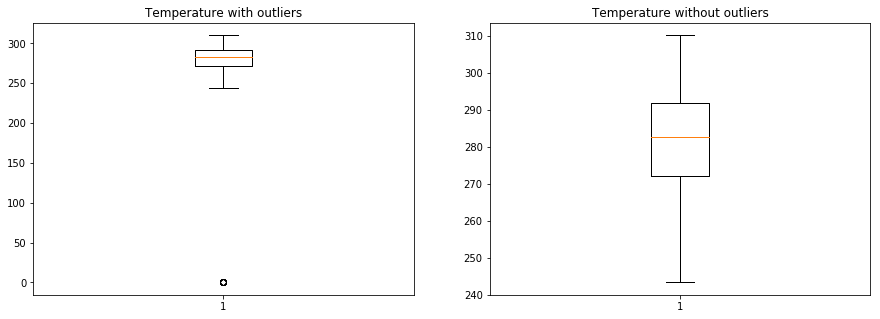

In [26]:
# Your code:

# Read csv file population_density_categorical.csv
df = pd.read_csv('population_density_categorical.csv')

# Boxplot to find outliers
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Temperature with outliers")
plt.boxplot(df['temperature'])

# Removing outliers
df_temp_no_outliers = df[df.temperature > 50]

# Boxplot to check leftover outliers
plt.subplot(1,2,2)
plt.title("Temperature without outliers")
plt.boxplot(df_temp_no_outliers['temperature'])
plt.show()

Explanation:

Points outside of the whisker of the boxplot are considered to be outliers. Here we can see that we have those points with value of less then 50

   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [38]:
# Your code:

# For temperature with outliers
mean1 = np.mean(df['temperature'])
median1 = np.median(df['temperature'])
mode1 = df['temperature'].mode()[0]
# mode1 = stats.mode(df['temperature'])

# For temperature without outliers
mean2 = np.mean(df_temp_no_outliers['temperature'])
median2 = np.median(df_temp_no_outliers['temperature'])
mode2 = df_temp_no_outliers['temperature'].mode()[0]
# mode2 = stats.mode(df_temp_no_outliers['temperature'])

print(tabulate([["Temperature with outliers", mean1, median1, mode1],
                ["Temperature without outliers", mean2, median2, mode2]],
                headers=["","Mean", "Median", "Mode"],
                floatfmt=".5f",
                tablefmt='orgtbl'))

print("\nValues of the outliers:")
print(df['temperature'][df.temperature < 50])

|                              |      Mean |    Median |      Mode |
|------------------------------+-----------+-----------+-----------|
| Temperature with outliers    | 281.23988 | 282.55000 | 274.15000 |
| Temperature without outliers | 281.29175 | 282.55000 | 274.15000 |

Values of the outliers:
555      0.0
5046     0.0
6337     0.0
20615    0.0
22175    0.0
27700    0.0
39147    0.0
42374    0.0
Name: temperature, dtype: float64


Explanation:

There are 8 outliers in the `temperature` data. All of the outliers have the value 0. These outliers will not affect the Median and Mode of the data because Median and Mode don't depend on the total amount of the data. However, the outliers does affect the Mean of the data as shown in the result, since the Mean does depend on the total amount of data.

   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [5]:
# Your code:
print("Temperature data with outliers size = ", df['temperature'].size)
print("Temperature data without outliers size = ", df_temp_no_outliers['temperature'].size)
print("Number of row(s) deleted = ", df['temperature'].size - df_temp_no_outliers['temperature'].size)

Temperature data with outliers size =  43384
Temperature data without outliers size =  43376
Number of row(s) deleted =  8


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

Holiday population density mean value:
holiday
Christmas Day                 827.500000
Columbus Day                  519.400000
Independence Day             1076.000000
Labor Day                    1013.142857
Martin Luther King Jr Day     612.666667
Memorial Day                 1107.600000
New Years Day                1356.000000
State Fair                    634.800000
Thanksgiving Day              933.500000
Veterans Day                  691.400000
Washingtons Birthday          635.200000
Name: population_density, dtype: float64 

Holiday population density median value:
holiday
Christmas Day                 767.5
Columbus Day                  494.0
Independence Day             1060.0
Labor Day                    1026.0
Martin Luther King Jr Day     600.0
Memorial Day                 1082.0
New Years Day                1458.5
State Fair                    655.0
Thanksgiving Day              876.0
Veterans Day                  572.0
Washingtons Birthday          623.0
Name: populati

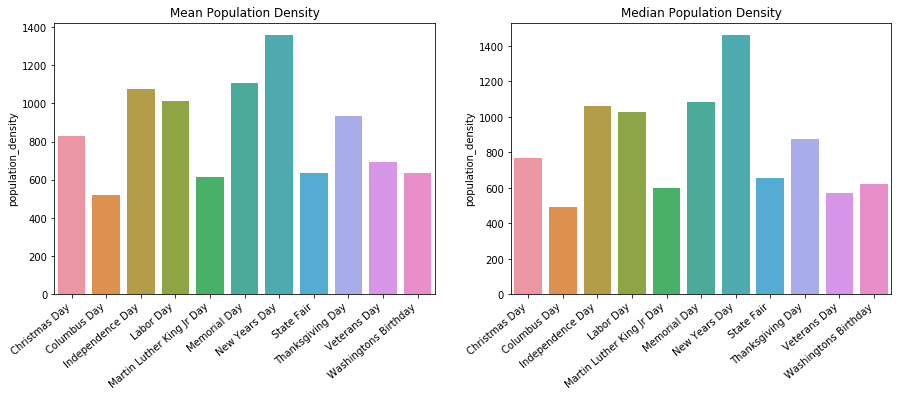

In [41]:
# Your code:

# Read csv file population_density.csv -> Original dataset
df = pd.read_csv('population_density.csv')

# Removing 'None' string from the data
df_holiday = df.replace(to_replace='None', value=np.nan).dropna()

# Mean population density grouped by holiday
print("Holiday population density mean value:")
holiday_mean = df_holiday.groupby('holiday', group_keys = True).mean()
print(holiday_mean['population_density'], "\n")

# Mean population density grouped by holiday
print("Holiday population density median value:")
holiday_median = df_holiday.groupby('holiday').median()
print(holiday_median['population_density'], "\n")

# Holiday for highest population density mean value
print("Holiday population density highest mean value:")
print(holiday_mean[holiday_mean['population_density'] == holiday_mean['population_density'].max()].index.values, "\n")
# print(holiday_mean['population_density'].max())

# Holiday for lowest population density mean value
print("Holiday population density lowest mean value:")
print(holiday_mean[holiday_mean['population_density'] == holiday_mean['population_density'].min()].index.values, "\n")

# Holiday for highest population density median value
print("Holiday population density highest median value:")
print(holiday_median[holiday_median['population_density'] == holiday_median['population_density'].max()].index.values, "\n")

# Holiday for lowest population density median value
print("Holiday population density lowest median value:")
print(holiday_median[holiday_median['population_density'] == holiday_median['population_density'].min()].index.values, "\n")

# Mean population density graph
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax = sns.barplot(holiday_mean.index.values, holiday_mean['population_density'])
plt.title("Mean Population Density")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") # Rotating x-axis label by 40 degrees

# Median population density graph
plt.subplot(1,2,2)
ax2 = sns.barplot(holiday_median.index.values, holiday_median['population_density'])
plt.title("Median Population Density")
ax2.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") # Rotating x-axis label by 40 degrees
# plt.tight_layout()
plt.show()

   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

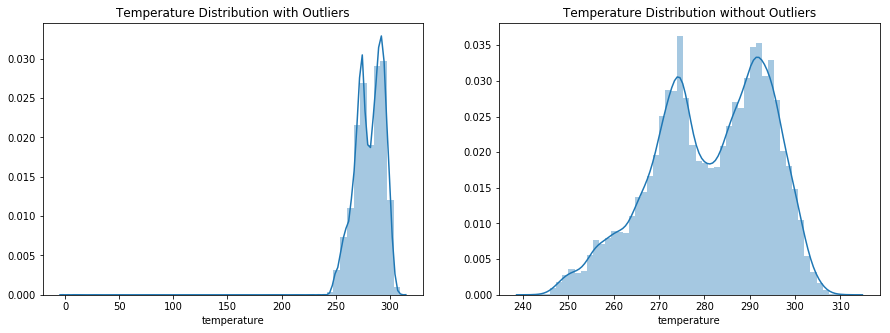

In [7]:
# Your code:

# Read csv file population_density_categorical.csv
df = pd.read_csv('population_density_categorical.csv')

# Distribution plot for temp. with outliers
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Temperature Distribution with Outliers")
sns.distplot(df['temperature'])

# Removing outliers
df_temp_no_outliers = df[df.temperature > 50]

# Distribution plot for temp. without outliers
plt.subplot(1,2,2)
plt.title("Temperature Distribution without Outliers")
sns.distplot(df_temp_no_outliers['temperature'])
plt.show()


   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

Top 5 highest bins for population_density
(364.0, 728.0]      4272
(4368.0, 4732.0]    3587
(4732.0, 5096.0]    3485
(728.0, 1092.0]     3099
(-7.28, 364.0]      3033
Name: population_density, dtype: int64 

Top 5 highest bins for temperature
(290.066, 293.4]      4936
(273.396, 276.73]     4625
(293.4, 296.734]      4372
(286.732, 290.066]    4095
(270.062, 273.396]    3835
Name: temperature, dtype: int64 



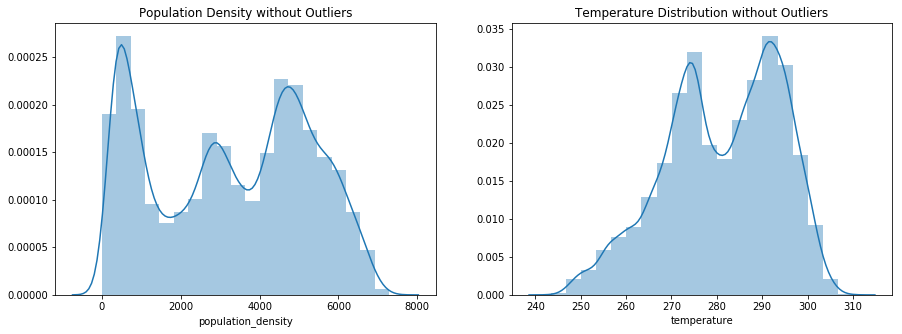

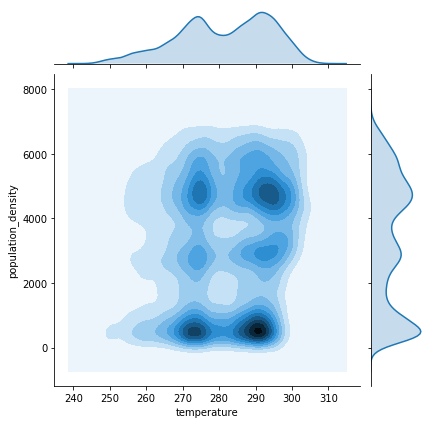

In [70]:
# Your code:

# Read csv file population_density_categorical.csv
df = pd.read_csv('population_density_categorical.csv')

# Removing outliers
df_temp_no_outliers = df[df.temperature > 50]

cats1, bins1 = pd.cut(df_temp_no_outliers['population_density'], bins=20, retbins=True)
cats2, bins2 = pd.cut(df_temp_no_outliers['temperature'], bins=20, retbins=True)

print("Top 5 highest bins for population_density")
print(cats1.value_counts().head(5), "\n")
print("Top 5 highest bins for temperature")
print(cats2.value_counts().head(5), "\n")

# Distribution plot for population density
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Population Density without Outliers")
sns.distplot(df_temp_no_outliers['population_density'], bins=20)

# Distribution plot for temp
plt.subplot(1,2,2)
plt.title("Temperature Distribution without Outliers")
sns.distplot(df_temp_no_outliers['temperature'], bins=20)
plt.show()

# Jointplot for temperature and population_density
sns.jointplot(df_temp_no_outliers['temperature'], df_temp_no_outliers['population_density'], kind="kde")
plt.show()

Explanation:

The highest frequency of data range can be seen from the jointplot for which the cluster has the darkest color.

Highest frequency of data:
* `population_density` :  (364.0, 728.0]
* `temperature`        :  (290.066, 293.4]

Second highest cluster range:
* `population_density`  : (290.066, 293.4]
* `temperature`         : (273.396, 276.73]

Third highest cluster range:
* `population_density`  : (4368.0, 4732.0]
* `temperature`         : (290.066, 293.4]

Fourth highest cluster range:
* `population_density`  : (4368.0, 4732.0]
* `temperature`         : (273.396, 276.73]

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [138]:
# Your code:

# Read csv file population_density_categorical.csv
df = pd.read_csv('population_density_categorical.csv')

# Removing outliers
df_temp_no_outliers = df[df.temperature > 50]

df_temp_no_outliers['temperature_categorical'] = pd.qcut(df_temp_no_outliers['temperature'], [0,0.25,0.75,1], labels = ["low", "medium", "high"])

df_temp_no_outliers.head(5)

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Unnamed: 0,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,population_density_categorical,temperature_categorical
0,45518,None,297.35,0.0,0.0,1,Clear,sky is clear,7/3/2018 0:00,722,very low,high
1,10495,None,251.48,0.0,0.0,1,Clear,sky is clear,12/7/2013 23:00,1716,low,low
2,1483,None,270.97,0.0,0.0,90,Clouds,overcast clouds,11/26/2012 10:00,4271,medium,low
3,17774,None,290.82,0.0,0.0,1,Clear,sky is clear,8/28/2015 0:00,680,very low,medium
4,23385,None,285.39,0.0,0.0,90,Rain,light rain,5/16/2016 2:00,285,very low,medium


   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [143]:
# Your code: -> https://www.python-course.eu/Decision_Trees.php

from p_decision_tree.DecisionTree import DecisionTree

# Changing variable name df_temp_no_ouliers to data
data = df_temp_no_outliers

# Extracting columns from the data frame
columns = df_temp_no_outliers.columns

# Selecting specific column as descriptive features -> holiday[1], temperature_categorical[6], weather_type[11]
descriptive_features = columns[[1, 6, 11]]

# Selecting specific column as target feature -> population_density_categorical[10]
label = columns[10]

# Converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

# Getting the values out of the column    
data_descriptive = data[descriptive_features].values
data_label = data[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)

# Calling DecisionTree constructor (the last parameter is criterion which can also be "gini")
decisionTree = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

# Here you can pass pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0,5000) # Setting minimum_samples to 5000 based on requirement

# Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree()

# print(dot)

print("System entropy: ", format(decisionTree.entropy))

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


descriptive features:
Index(['holiday', 'weather_type', 'temperature_categorical'], dtype='object')

target feature:
population_density_categorical
System entropy:  2.231662675413178


![](decisiontree.png)

The output of the decision tree is decisiontree.png or visualTree.gv.pdf

Both are the same tree just in different format

   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3? 

Explanation: 

Based on the output of the decision tree, the best attribute for the second split is: `weather_type`

For the first round the best attribute is: `temperature_categorical`

## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [11]:
# Your code:

# Read csv file population_density_categorical.csv
df = pd.read_csv('population_density_categorical.csv')

# Convert date_time dtype=object to standarized pandas datetime dtype=datetime64[ns]
df['date_time'] = pd.to_datetime(df['date_time'])

# Exctracting hour from the datetime
df['date_time'] = df['date_time'].dt.hour


   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation:

`temperature`, `rain_1h`, `snow_1h`, `clouds_percentage`, `date_time` and `population_density` are a suitable input for linear regression since they are numerical data. As for `holiday`, since it is a categorical data, we need to modify it into numerical data first (e.g. via one-hot-encoding)

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

In [12]:
print(df['holiday'].value_counts(), "/n")

None                         43332
Thanksgiving Day                 6
Martin Luther King Jr Day        6
Labor Day                        6
Memorial Day                     5
Columbus Day                     5
Independence Day                 5
Veterans Day                     4
Washingtons Birthday             4
New Years Day                    4
Christmas Day                    4
State Fair                       3
Name: holiday, dtype: int64 /n


Explanation:

Instead of doing a one-hot-encoding for the `holiday` feature, we decided to use a binary encoding. The reason is there are multiple holiday types in the data, however each holiday value is very small. Most of the data of the holiday is None (Result can be seen above). We actually doesn't really care what kind of holiday it is, we just need to know whether or not it is a holiday to predict the `population_density`. Thus we use 0 for None holiday and 1 for holiday. We expect by doing this could improve our regression function accuracy because with less variables, hopefully the regression can predict better.


In [13]:
# Your code:

# Encoding the holiday feature
df['binary_holiday'] = np.where(df['holiday'].str.contains("None"), 0, 1)

df_preprocessed = df[['temperature', 
                      'rain_1h', 
                      'snow_1h', 
                      'clouds_percentage', 
                      'date_time', 
                      'binary_holiday', 
                      'population_density']]

X = df_preprocessed.iloc[:, :-1]
y = df_preprocessed.iloc[:, -1]

df_preprocessed.head(2)


,temperature,rain_1h,snow_1h,clouds_percentage,date_time,binary_holiday,population_density
0,297.35,0.0,0.0,1,0,0,722
1,251.48,0.0,0.0,1,23,0,1716


In [14]:
print(df['binary_holiday'].value_counts(), "/n")

0    43332
1       52
Name: binary_holiday, dtype: int64 /n


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

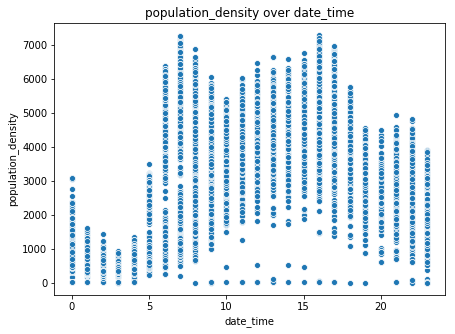

In [15]:
# Your code:
plt.figure(figsize=(7,5))
plt.title("population_density over date_time")
plt.xlabel("date_time(hours)")
plt.ylabel("population_density")
sns.scatterplot(X["date_time"],y)
plt.show()

   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [82]:
# Your code:

# subset random sampling (RS)
RegA = df_preprocessed.sample(frac=0.5, random_state=394394)

# subset unsersampling(US) using holiday and non-holiday
df_holiday = df_preprocessed[df_preprocessed.binary_holiday == 1]
df_nonholiday = df_preprocessed[df_preprocessed.binary_holiday == 0]
RegB = pd.concat([df_holiday,
                  df_nonholiday.sample(n=df_holiday.shape[0])])

# Print data to csv file
RegA.to_csv('RegA.csv')
print("RegA.csv created")
RegB.to_csv('RegB.csv')
print("RegB.csv created")

print("Number of data for Random Sampling: ", RegA.shape[0])
print("Number of data for Under Sampling: ", RegB.shape[0])

RegA.csv created
RegB.csv created
Number of data for Random Sampling:  21692
Number of data for Under Sampling:  104


Explanation:

We choose *random sampling* and *undersampling* with focus on `binary_holiday` features. `binary_holiday` is the feature after we do the binary encoding for `holiday` feature so that it changed from cateogrical to numerical data.

Firstly, we choose *random sampling* because this is one of the best method to do sampling because by selecting data at random from the original data we can try to preserve the representation of the data in a smaller form, given that we do it correctly in which case each data has equal probability to be choosen. Furthermore *random sampling* remove bias when we are doing the sampling.

For our second sampling we wanted to do *under sampling* with focus on under sampling the `binary_holiday` feature. So we want to under sample the None-holiday with regards to the number of actual holiday. We want to do this because we want to try and remove the bias of the data since None-holiday is the majority of the data and we want to try to train the classifier to be more sensitive.

From both sampling method, we think that *random sampling* will produce better result compared to the *under sampling*. In *under sampling* we try to balance the imbalanced data of holiday and None-holiday. However, when balancing the data we are discarding a lot of data and we might lose useful information. Also based on the number of data left in the sample, our *random sampling* has higher data count compared to *under sampling*.

   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [81]:
# Your code:

# Random Sampling Regression
modelRS = LinearRegression()
modelRS.fit(X=RegA.iloc[:, :-1], y=RegA.iloc[:, -1])
y_RS = modelRS.predict(X)

# Undersampling Regression
modelUS = LinearRegression()
modelUS.fit(X=RegB.iloc[:, :-1], y=RegB.iloc[:, -1])
y_US = modelUS.predict(X)

(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

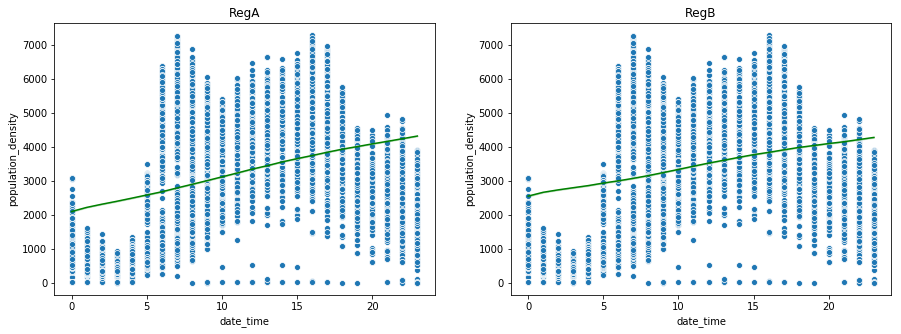

In [18]:
# Your code:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("RegA")
plt.xlabel("date_time(hours)")
plt.ylabel("population_density")
sns.scatterplot(X["date_time"],y)
sns.lineplot(X["date_time"], y_RS, color = "g")

plt.subplot(1,2,2)
plt.title("RegB")
plt.xlabel("date_time(hours)")
plt.ylabel("population_density")
sns.scatterplot(X["date_time"],y)
sns.lineplot(X["date_time"], y_US, color = "g")
plt.show() 


   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

In [19]:
# Your code:

def median_squared_error(value_x, value_y):
    return median_absolute_error(value_x, value_y) ** 2

print(tabulate([['Mean squared error', mean_squared_error(y, y_RS), mean_squared_error(y, y_US)], 
                ['Mean absolute error', mean_absolute_error(y, y_RS), mean_absolute_error(y, y_US)],
                ['Median squared error', median_squared_error(y, y_RS), median_squared_error(y, y_US)],
                ['R2 Score', r2_score(y, y_RS), r2_score(y, y_US)]],
                headers=['Scoring', 'RegA', 'RegB', 'R2 Score'], 
                floatfmt=".5f",
                tablefmt='orgtbl'))


| Scoring              |          RegA |          RegB |
|----------------------+---------------+---------------|
| Mean squared error   | 3402772.02962 | 3483921.06498 |
| Mean absolute error  |    1631.49573 |    1655.63789 |
| Median squared error | 2651747.78020 | 2937172.71173 |
| R2 Score             |       0.13789 |       0.11733 |


   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:

Based on the score above, we can see that RegA perform better than RegB. This is align with our assumption from question 3d.

However, both results could be considered bad because the error is so high. After exploring the data, we conclude that this kind of data is not suitable for a linear regression since they are too complex for a linear regression. Some of the data is non-linear, for example `date_time`, and some of data has no apparent characteristic for a regression, for example `temperature` and `clouds_percentage`. Also some of the data has 1 dominant value of zeroes like `snow_1h` and `rain_1h`.

In our opinion, only `date_time` feature with only hours is the best kind of data for regression since we can see some what of a non-linear pattern.

By restricting the number of features, the model score might improve since the model has to deal with less complex data.

Another thing that might improve the model is removing outliers from the data. In our case we know from the previous question that the `temperature` feature has outliers.

Side notes:

We also did R2 score differences from eliminating one feature at a time to see which feature has a big impact for our linear regression model. Turns out by putting all features together produce the best R2 score for our linear regression model. However, only `date_time` feature is the most significant feature out of the rest since it has the biggest R2 score difference. The rest of the features, help improve the R2 score albeit very small.

See the last result of Question 3

Another interesting result is one-hot-encoding for holiday perform better than binary-encoding, but the difference in score is very small.

Here you can see that rain_1h and snow_1h have zeroes as their dominant value:
0.00    40238
0.25      869
0.51      238
1.02      114
Name: rain_1h, dtype: int64 

0.00    43329
0.05       13
0.06       10
0.10        6
Name: snow_1h, dtype: int64 



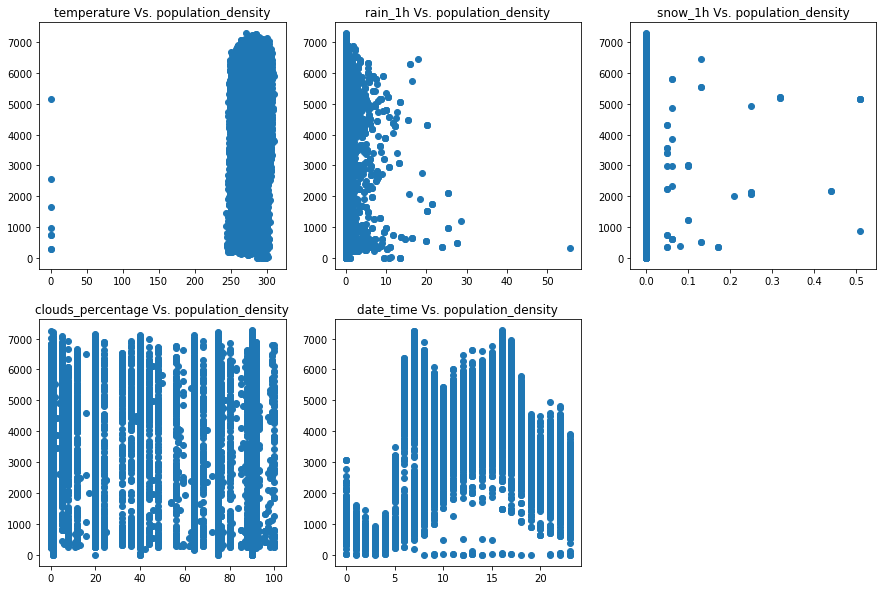

In [114]:
df = pd.read_csv('population_density_categorical.csv')

# Convert date_time dtype=object to standarized pandas datetime dtype=datetime64[ns]
df['date_time'] = pd.to_datetime(df['date_time'])

# Exctracting hour from the datetime
df['date_time'] = df['date_time'].dt.hour

print("Here you can see that rain_1h and snow_1h have zeroes as their dominant value:")
print(df['rain_1h'].value_counts().head(4), "\n")
print(df['snow_1h'].value_counts().head(4), "\n")

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.title("temperature Vs. population_density")
plt.scatter(df[['temperature']], df['population_density'])

plt.subplot(2,3,2)
plt.title("rain_1h Vs. population_density")
plt.scatter(df[['rain_1h']], df['population_density'])

plt.subplot(2,3,3)
plt.title("snow_1h Vs. population_density")
plt.scatter(df[['snow_1h']], df['population_density'])

plt.subplot(2,3,4)
plt.title("clouds_percentage Vs. population_density")
plt.scatter(df[['clouds_percentage']], df['population_density'])

plt.subplot(2,3,5)
plt.title("date_time Vs. population_density")
plt.scatter(df[['date_time']], df['population_density'])

plt.show()

In [112]:
# Read csv file population_density_categorical.csv
df = pd.read_csv('population_density_categorical.csv')

# Convert date_time dtype=object to standarized pandas datetime dtype=datetime64[ns]
df['date_time'] = pd.to_datetime(df['date_time'])

# Exctracting hour from the datetime
df['date_time'] = df['date_time'].dt.hour

df[df.temperature > 50]

# Descriptive Features
X = df[['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time']] # complete
X1 = df[['temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time']] # without holiday
X2 = df[['holiday', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time']] # without temperature
X3 = df[['holiday', 'temperature', 'snow_1h', 'clouds_percentage', 'date_time']] # without rain_1h
X4 = df[['holiday', 'temperature', 'rain_1h', 'clouds_percentage', 'date_time']] # without snow_1h
X5 = df[['holiday', 'temperature', 'rain_1h', 'snow_1h','date_time']] # without clouds_percentage
X6 = df[['holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage']] # without date_time

# Target Feature
y = df['population_density']

# Using one-hot encoding for 'holiday'
X = pd.get_dummies(X, columns = ["holiday"])
X2 = pd.get_dummies(X2, columns = ["holiday"])
X3 = pd.get_dummies(X3, columns = ["holiday"])
X4 = pd.get_dummies(X4, columns = ["holiday"])
X5 = pd.get_dummies(X5, columns = ["holiday"])
X6 = pd.get_dummies(X6, columns = ["holiday"])

classifier = LinearRegression()
classifier.fit(X,y)
pred = classifier.predict(X)

classifier1 = LinearRegression()
classifier1.fit(X1,y)
pred1 = classifier1.predict(X1)

classifier2 = LinearRegression()
classifier2.fit(X2,y)
pred2 = classifier2.predict(X2)

classifier3 = LinearRegression()
classifier3.fit(X3,y)
pred3 = classifier3.predict(X3)

classifier4 = LinearRegression()
classifier4.fit(X4,y)
pred4 = classifier4.predict(X4)

classifier5 = LinearRegression()
classifier5.fit(X5,y)
pred5 = classifier5.predict(X5)

classifier6= LinearRegression()
classifier6.fit(X6,y)
pred6 = classifier6.predict(X6)

# Binary encoding holiday
df['new_holiday'] = np.where(df['holiday'].str.contains("None"), 0, 1)
X7 = df[['new_holiday', 'temperature', 'rain_1h', 'snow_1h', 'clouds_percentage', 'date_time']]
classifier7 = LinearRegression()
classifier7.fit(X7,y)
pred7 = classifier7.predict(X7)

r2_1 = r2_score(y, pred)  #complete
r2_2 = r2_score(y, pred1) #without holiday
r2_3 = r2_score(y, pred2) #without temperature
r2_4 = r2_score(y, pred3) #without rain_1h
r2_5 = r2_score(y, pred4) #without snow_1h
r2_6 = r2_score(y, pred5) #without clouds_percentage
r2_7 = r2_score(y, pred6) #without date_time
r2_8 = r2_score(y, pred7) #binary encoding

r2diff_1 = r2_1 - r2_2
r2diff_2 = r2_1 - r2_3
r2diff_3 = r2_1 - r2_4
r2diff_4 = r2_1 - r2_5
r2diff_5 = r2_1 - r2_6
r2diff_6 = r2_1 - r2_7
r2diff_7 = r2_1 - r2_8

print(tabulate([["Compelete", r2_1, "-"],
                ["Without holiday", r2_2, r2diff_1],
                ["Without temperature", r2_3, r2diff_2],
                ["Without rain_1h", r2_4, r2diff_3],
                ["Without snow_1h", r2_5, r2diff_4],
                ["Without clouds_percentage", r2_6, r2diff_5],
                ["Without date_time", r2_7, r2diff_6],
                ["holiday binary enconding", r2_8, r2diff_7]],
               headers=["Description", "R2 Score", "Difference with complete feature"],
               tablefmt="presto"))

 Description               |   R2 Score | Difference with complete feature
---------------------------+------------+------------------------------------
 Compelete                 |  0.138087  | -
 Without holiday           |  0.137604  | 0.00048369270749648585
 Without temperature       |  0.128142  | 0.00994550044392084
 Without rain_1h           |  0.137002  | 0.001085814294267018
 Without snow_1h           |  0.138085  | 2.5080802954491332e-06
 Without clouds_percentage |  0.134225  | 0.003862234284268462
 Without date_time         |  0.0273463 | 0.11074117565952535
 holiday binary enconding  |  0.138069  | 1.8286123668831422e-05


## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [3]:
# Your code:
df = pd.read_csv('population_density_categorical.csv', usecols=['holiday', 'temperature', 'rain_1h', 'snow_1h', 
                                                                'clouds_percentage','date_time', 
                                                                'population_density_categorical'])
# Drop information on the date
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'] = df['date_time'].dt.hour

   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [4]:
# Your code:
print('one hot encoding')
df_onehot_holiday = pd.get_dummies(df['holiday'])
df_onehot_hour = pd.get_dummies(df['date_time'])
df = pd.concat([df_onehot_holiday, df_onehot_hour, df.drop(columns=['holiday', 'date_time'])], axis=1)

one hot encoding


Explanation:

The SVM cannot take categorical descriptive features as inputs. Therefore, all categorical features (in this case only 'holiday') have to be be transformed into numerical features. We will use One Hot Encoding to do so. Afterwards, the encoded 'holiday' descriptive feature replaces the 'holiday' feature in the dataframe.

   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [5]:
# Your code:

train_share = 0.67
df = df.sample(df.shape[0], random_state=394943)
svmTrain = df.iloc[:int(df.shape[0]*train_share)][:]
svmTrain.to_csv('svmTrain.csv')
svmTest = df.iloc[svmTrain.shape[0]:][:]
svmTest.to_csv('svmTest.csv')

import numpy as np
X_train = svmTrain.drop(columns='population_density_categorical', axis=1)
y_train = svmTrain['population_density_categorical']
X_test = svmTest.drop(columns='population_density_categorical', axis=1)
y_test = svmTest['population_density_categorical']

# Checking for NaNs in the dataset
df_nan = df[df.isna().any(axis=1)]
if df_nan.empty == True:
    print('There are no NaNs in the dataset')
else:
    print('The dataset contains NaNs')

There are no NaNs in the dataset


Explanation:

In order to create the desired svmTrain and svmTest dataset, we first shuffled and then split the dataset. We decided to use 67% of the data for training and 33% for testing, so that the training set is not too large, but still covers a reasonable amount of the data. Afterwards, the svmTrain and svmTest are split into descriptive features (X_train, X_test) and the target features (y_train, y_test) for model training and testing.

   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

Explanation:

Combination of parameters
We use two different kernels (linear and rbf) in order see which one works best. Initially, we wanted to train 4 different SVMs:
* classifier_1 = SVC(C=1, kernel='linear')
* classifier_2 = SVC(C=1000, kernel='linear') (not used, since computationally expensive)
* classifier_3 = SVC(C=1, kernel='rbf', gamma=0.1)
* classifier_4 = SVC(C=1000, kernel='rbf', gamma=0.0001)

This way, we could have compared very well, which of the two kernels works best while still varying the parameter C a little. However, training the classifier_2 was too computationally expensive and was therefore excluded. We used the value C=1 for both the linear and the rbf kernel, since it is the most likely to find a balance between overfitting and underfitting. The best way to explore which are the best combinations of parameter values is sklearn's GridSearchCV. However, this would exceed the task. Therefore, we chose C=1000 (decreases the SVM's margin but could cause overfitting) and gamma=0.0001 in order to see, if we could improve classification by using a lower margin. The sklearn's SVM RBF documentation ('https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html') suggests to use low gamma values together with high values for C, that's why we set gamma to 0.0001.
The 'poly' kernel was not used, since it was too computationally expensive (implemented with degree=4).

In [6]:
# Your code:
from sklearn.svm import SVC
import datetime
print('initializing the classifiers')
classifier_1 = SVC(C=1, kernel='linear')
classifier_2 = SVC(C=1, kernel='rbf', gamma=0.1)
classifier_3 = SVC(C=1000, kernel='rbf', gamma=0.0001)

print('training classifier_1')
t_0 = datetime.datetime.now()
classifier_1.fit(X_train, y_train)
t_1 = datetime.datetime.now()
print('training duration classifier_1 '+str(t_1 - t_0))
print('training classifier_2')
classifier_2.fit(X_train, y_train)
t_2 = datetime.datetime.now()
print('training duration classifier_2 '+str(t_2 - t_1))
print('training classifier_3')
classifier_3.fit(X_train, y_train)
t_3 = datetime.datetime.now()
print('training duration classifier_3 '+str(t_3 - t_2))
#print('training classifier_4')
#classifier_4.fit(X_train, y_train)
#t_4 = datetime.datetime.now()
#print('training duration classifier_4 '+str(t_4 - t_3))


initializing the classifiers
training classifier_1
training duration classifier_1 0:01:43.246795
training classifier_2
training duration classifier_2 0:01:45.345885
training classifier_3
training duration classifier_3 0:01:48.817775


   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [7]:
# Your code:
print('predicting')
y_pred_1 = classifier_1.predict(X_test)
y_pred_2 = classifier_2.predict(X_test)
y_pred_3 = classifier_3.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print('metrics: accuracies')
acc_1 = accuracy_score(y_test, y_pred_1)
acc_2 = accuracy_score(y_test, y_pred_2)
acc_3 = accuracy_score(y_test, y_pred_3)
print('Accuracy Classifier_1: ', str(acc_1), '\n')
print('Accuracy Classifier_2: ', str(acc_2), '\n')
print('Accuracy Classifier_3: ', str(acc_3), '\n')

print('metrics: classification reports')
classReport_1 = classification_report(y_test, y_pred_1)
classReport_2 = classification_report(y_test, y_pred_2)
classReport_3 = classification_report(y_test, y_pred_3)
print('Classification Report Classifier_1: \n', classReport_1, '\n')
print('Classification Report Classifier_2: \n', classReport_2, '\n')
print('Classification Report Classifier_3: \n', classReport_3, '\n')


predicting
metrics: accuracies
Accuracy Classifier_1:  0.6948383041139904 

Accuracy Classifier_2:  0.670042606691346 

Accuracy Classifier_3:  0.6988894321436055 

metrics: classification reports
Classification Report Classifier_1: 
               precision    recall  f1-score   support

        high       0.62      0.88      0.73      3990
         low       0.62      0.66      0.64      2197
      medium       0.78      0.24      0.36      2750
   very high       0.53      0.67      0.59      1416
    very low       0.93      0.86      0.89      3964

    accuracy                           0.69     14317
   macro avg       0.69      0.66      0.64     14317
weighted avg       0.72      0.69      0.67     14317
 

Classification Report Classifier_2: 
               precision    recall  f1-score   support

        high       0.59      0.86      0.70      3990
         low       0.66      0.54      0.60      2197
      medium       0.62      0.33      0.43      2750
   very high       

   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:

The rbf kernel with C=1000 achieves the best accuracy of the three tested ones (70%). The linear kernel's accuracy is nearly as good and achieves 69%. Furthermore, the rbf kernel with C=1 is not far off and still achieves an accuracy of 67%.Looking at the classification reports, there is a similar picture: All three classifiers behave quite similar. What is interesting is the fact, that 'very low' population_density is classified way better than 'very high' population density. This could be due to the fact, that the support of 'very low' samples is more than twice as large compared to 'very high' (3964 vs. 1416), and hence possibly making  the 'very low' instance easier to learn. However, 'high' population density also has a very high support (3990 samples), but only achieves an average precision. Also, all classifiers perform poor on the medium population density: of all 2750 samples of category 'medium', the rbf kernel with C=1000 (best overall accuracy) only achieves to classify 29% correctly (recall).In the end, all classifiers achieve very similar results. This is probably due to the complex dataset, in which features like 'snow_1h' and 'rain_1h' almost always take on the same value.In the end, I would recommend using the RBF kernel. However, I would suggest conducting intensive hyperparameter tuning using sklearn's GridSearchCV in order to find the best combination that fits the dataset. Another reason is the computational expense (shown by the training durations). RBF is very scalable, whereas the linear kernel and poly kernel (degree=4) are computationally very expensive. Furthermore, I would also recommend scaling the dataset to zero mean and unit variance and testing the models on a separate validation set preferably with cross validation for more reliable results.


## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [169]:
# Your code:
import pandas as pd
df = pd.read_csv('population_density_categorical.csv', index_col=0, nrows=4000)

# Possible extracted features
All = list(df.columns.difference(['population_density_categorical']))
print('Possible extracted features: \n', All)

# Categorical features
categorical = list(df.columns.difference(['population_density_categorical', 'clouds_percentage', 'population_density', 'rain_1h', 'snow_1h', 'temperature']))
print('\nCategorical features before encoding: \n', categorical)

# Count number of unique values inside each categorical feature
unique_holiday = set(df['holiday'])             
unique_holiday_count = len(unique_holiday) 
print('\nNumber of unique values in holiday:', unique_holiday_count)

unique_weather_type = set(df['weather_type'])             
unique_weather_type_count = len(unique_weather_type) 
print('\nNumber of unique values in weather_type:', unique_weather_type_count)

unique_weather_type_details = set(df['weather_type_details'])             
unique_weather_type_details_count = len(unique_weather_type_details) 
print('\nNumber of unique values in weather_type_details:', unique_weather_type_details_count)

df['date_time'] = pd.to_datetime(df['date_time'])

unique_date_hour = set(df['date_time'].dt.hour)             
unique_date_hour_count = len(unique_date_hour) 
print('\nNumber of unique hour values in date_time:', unique_date_hour_count)

unique_date_weekday = set(df['date_time'].dt.weekday)             
unique_date_weekday_count = len(unique_date_weekday) 
print('\nNumber of unique weekday values in date_time:', unique_date_weekday_count)

unique_date_week = set(df['date_time'].dt.week)             
unique_date_week_count = len(unique_date_week) 
print('\nNumber of unique week values in date_time:', unique_date_week_count)

unique_date_year = set(df['date_time'].dt.year)             
unique_date_year_count = len(unique_date_year) 
print('\nNumber of unique year values in date_time:', unique_date_year_count)

# Number of possible inputs of categorical data after one-hot-encoding => binary inputs
binary_inputs = unique_holiday_count+unique_weather_type_count+unique_weather_type_details_count+unique_date_hour_count+unique_date_weekday_count+unique_date_week_count+unique_date_year_count
print('\nNumber of possible inputs of categorical data after one-hot-encoding:', binary_inputs)

# Number of possible input patterns of categorical data after one-hot-encoding
num_total_input_patterns = unique_holiday_count*unique_weather_type_count*unique_weather_type_details_count*unique_date_hour_count*unique_date_weekday_count*unique_date_week_count*unique_date_year_count
print('\nNumber of possible input patterns of categorical data after one-hot-encoding:', num_total_input_patterns)

Possible extracted features: 
 ['clouds_percentage', 'date_time', 'holiday', 'population_density', 'rain_1h', 'snow_1h', 'temperature', 'weather_type', 'weather_type_details']

Categorical features before encoding: 
 ['date_time', 'holiday', 'weather_type', 'weather_type_details']

Number of unique values in holiday: 5

Number of unique values in weather_type: 10

Number of unique values in weather_type_details: 33

Number of unique hour values in date_time: 24

Number of unique weekday values in date_time: 7

Number of unique week values in date_time: 53

Number of unique year values in date_time: 7

Number of possible inputs of categorical data after one-hot-encoding: 139

Number of possible input patterns of categorical data after one-hot-encoding: 102841200


Explanation:

* All descriptive features are possible inputs of the network. However, categorical features like 'holiday', 'weather_type' and 'weather_type_details' have to be converted to numerical features (for example by one hot encoding) in order to be used. 
* The number of possible patterns of inputs is very dependent on how the categorical features are encoded. Here, the 'date_time' feature is particularly important, since it can be encoded in many different ways, depending on how much information we want to use for model training.
* There is a total of 4 categorical features before encoding, but if one-hot-encoding is used on all of them - with the date_time feature being encoded by separating the hour, weekday, week and year - we would have 139 binary features. In order to calculate the total number of input patterns, one has to multiply the number of unique values of each categorical feature before one-hot-encoding. In our case, those categorical features are holiday, weather_type, weather_type_details, hour, weekday, week and year. If a one-hot-encoded feature takes on the value 1, all other one-hot-encoded features that belong to the same categorical feature have to take on the value 0. 
* Therefore, the total number of input patterns is 102841200.

   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:

We expect that the Neural Network algorithm will provide a more accurate result than the other methods used in this assignment, because a Neural Network can learn and model non-linear and complex relationships which is what we have in our dataset. 
The complexity of the dataset is very well depicted by the graph of the linear regression function in question 3f. The linear regression line tries to use a linear function in order to best possible predict the population density if supplied with certain inputs. However, a linear function is not a good model in order to accurately predict the population density. This is shown by the high errors.
In contrast, the neural networks is able to map an non linear function, which is what is needed in order to perform well on this dataset. 


In [170]:
# Your code:

   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:

The network can only take numerical values as input. Therefore, all categorical features have to be transformed. We do it in the following way:
- the holiday feature is transformed using one hot encoding. We encode it as either holiday or non-holiday, since there are so few holiday instances, which should all be categorized as 'very_low' is shown by the plots in question 1d.
- the weather_type feature is not used at all. weather_type and weather_type_details are dependent of each other since *  weather_type_details builds up on weather_type and should carry all weather_type's information already.
- weather_type_details is transformed using one hot encoding
- date_time is transformed using one hot encoding, but in the following way: 
     - the hour of the day is encoded separately, so that changes during the day can be detected
     - the day of the week is encoded separately, since the population density is also dependent of the week day
     - the week of the year is encoded separately to include seasonal information
     - the year is encoded separately since there might also be changes over the years.


In [171]:
# Your code:
import pandas as pd
import datetime

df = pd.read_csv('population_density_categorical.csv', nrows=4000)
df['date_time'] = pd.to_datetime(df['date_time'])

df_target = df['population_density_categorical']
df_temperature = df['temperature']
df_rain_1h = df['rain_1h']
df_snow_1h = df['snow_1h']
df_clouds_percentage = df['clouds_percentage']

# One-hot-encoding
df_onehot_holiday = pd.get_dummies(df['holiday'])
df_binary_holiday = np.where(df['holiday'].str.contains("None"), 0, 1)
df_binary_holiday = pd.get_dummies(df_binary_holiday)
df_onehot_weather_details = pd.get_dummies(df['weather_type_details'])
df_onehot_hour = pd.get_dummies(df['date_time'].dt.hour)
df_onehot_weekday = pd.get_dummies(df['date_time'].dt.weekday)
df_onehot_week = pd.get_dummies(df['date_time'].dt.week)
df_onehot_year = pd.get_dummies(df['date_time'].dt.year)

#print(df.columns.values)
df_numerical = df.drop(columns=['Unnamed: 0', 'holiday', 'weather_type', 'weather_type_details', 'date_time',
                                'population_density', 'population_density_categorical'])

df_allinputs = pd.concat([df_numerical,
                          df_binary_holiday,
                          df_onehot_weather_details,
                          df_onehot_hour,
                          df_onehot_weekday,
                          df_onehot_week,
                          df_onehot_year], axis=1)

print(df_allinputs.shape)
# print('These are all extracted input features after one hot encoding: \n')
# for col in df_allinputs.columns[:-1]:
#     print(str(col))



(4000, 130)


   (d) Train your network with default hyperparameters and return the parameters.

In [172]:
# Your code:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metric
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import pandas as pd
import numpy as np

seed = 394943
df = pd.concat([df_allinputs, df_target], axis=1)
print(df.shape)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=2000, random_state=seed)

# Standardize inputs
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MLP classifier with default parameters
nn_default = MLPClassifier(random_state=seed)
nn_default.fit(X_train,y_train)
print('Input shape: ', X_train.shape, 'output shape: ', y_train.shape)
print('Number of weights in layers: ', [coef.shape for coef in nn_default.coefs_])
print('Prediction accuracy on training set: ', accuracy_score(y_train, nn_default.predict(X_train)))
print('MLP parameters:')
nn_default.get_params()

(4000, 131)
Input shape:  (2000, 130) output shape:  (2000,)
Number of weights in layers:  [(130, 100), (100, 5)]
Prediction accuracy on training set:  1.0
MLP parameters:


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 394943,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

Explanation:

Since we are supposed to use the training data for model training and testing, we implemented the cross validation technique in order to assure that we find the best combination of the number of layers and the number of nodes. Cross validation is needed as a model will almost always perform better when tested on the data it was trained on, than when tested a an unseen test dataset. Since our model is likely to overfit (the prediction accuracy in question 5d was 1!!), cross validation is needed. Only the accuracy scores are used for the optimization, because they are a good measure for the performance on the classification task.

First, we are training and testing a multilayer perceptron using 0, 1 and 2 hidden layers (each with 100 units).

In [173]:
# Your code: (number of hidden layers)

# crossval for default settings to get accuracy for comparison
from sklearn.model_selection import cross_val_score

# set a seed, so that all randomizations in the process are the same every time this script is started.
np.random.seed(seed)
list_num_layers = [(), (100,), (100,100)]
for num_layers in list_num_layers:
    np.random.seed(seed)
    mlp_trial = MLPClassifier(hidden_layer_sizes=num_layers)
    mlp_trial_score = cross_val_score(mlp_trial, X_train, y_train, scoring='accuracy', cv=5)
    print('MLP hidden layers set to {}'.format(num_layers))
    print('Accuracies during runs: ', mlp_trial_score)
    print('Mean accuracy: ', np.mean(mlp_trial_score))
    print(' ')

MLP hidden layers set to ()
Accuracies during runs:  [0.72208437 0.69727047 0.7361809  0.70854271 0.7160804 ]
Mean accuracy:  0.7160317717620359
 
MLP hidden layers set to (100,)
Accuracies during runs:  [0.71215881 0.70471464 0.74623116 0.70351759 0.71356784]
Mean accuracy:  0.7160380064092173
 
MLP hidden layers set to (100, 100)
Accuracies during runs:  [0.70223325 0.69230769 0.74874372 0.6959799  0.70100503]
Mean accuracy:  0.708053917228824
 


The results are astonishing, because the multilayer perceptron without hidden layers actually performs best. We think that we therefore have to improve our feature engineering. We tried excluding both the 'rain_1h' and 'snow_1h' features, which did not improve the results. Dropping the encoded holiday feature improves the results, as the following code shows:

In [174]:
df_allinputs = pd.concat([df_numerical,
                          df_onehot_weather_details,
                          df_onehot_hour,
                          df_onehot_weekday,
                          df_onehot_week,
                          df_onehot_year], axis=1)
df = pd.concat([df_allinputs, df_target], axis=1)
print(df.shape)

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=2000, random_state=seed)

# Standardize inputs
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

list_num_layers = [(), (100,), (100,100)]
for num_layers in list_num_layers:
    np.random.seed(seed)
    mlp_trial = MLPClassifier(hidden_layer_sizes=num_layers)
    mlp_trial_score = cross_val_score(mlp_trial, X_train, y_train, scoring='accuracy', cv=5)
    print('MLP hidden layers set to {}'.format(num_layers))
    print('Accuracies during runs: ', mlp_trial_score)
    print('Mean accuracy: ', np.mean(mlp_trial_score))
    print(' ')

(4000, 129)
MLP hidden layers set to ()
Accuracies during runs:  [0.71960298 0.69975186 0.73115578 0.68844221 0.69849246]
Mean accuracy:  0.7074890581941968
 
MLP hidden layers set to (100,)
Accuracies during runs:  [0.7146402  0.7146402  0.7638191  0.7160804  0.74623116]
Mean accuracy:  0.7310822100577329
 
MLP hidden layers set to (100, 100)
Accuracies during runs:  [0.72704715 0.71712159 0.74874372 0.70100503 0.72613065]
Mean accuracy:  0.724009626295248
 


The MLP works best with only one hidden layer. Now we will find out which number of nodes works the best. We use different numbers of units, starting with and then increasing by steps of 20 until we get to 240.

In [175]:
# Your code: (number of nodes in the hidden layer)
print('The number of input features is: ' + str(X_train.shape[1]))
list_num_units = [20*i+20 for i in range(0, 12)]
for num_units in list_num_units:
    np.random.seed(seed)
    mlp_trial = MLPClassifier(hidden_layer_sizes=(num_units))
    mlp_trial_score = cross_val_score(mlp_trial, X_train, y_train, scoring='accuracy', cv=5)
    print('MLP 1 hidden layers, {} units'.format(num_units))
    print('Accuracies during runs: ', mlp_trial_score)
    print('Mean accuracy: ', np.mean(mlp_trial_score))
    print(' ')


The number of input features is: 128
MLP 1 hidden layers, 20 units
Accuracies during runs:  [0.69230769 0.69478908 0.71859296 0.69849246 0.7160804 ]
Mean accuracy:  0.7040525206678555
 
MLP 1 hidden layers, 40 units
Accuracies during runs:  [0.71712159 0.66501241 0.74120603 0.67336683 0.71105528]
Mean accuracy:  0.7015524271481477
 
MLP 1 hidden layers, 60 units
Accuracies during runs:  [0.71960298 0.69478908 0.74371859 0.7160804  0.70351759]
Mean accuracy:  0.7155417284935846
 
MLP 1 hidden layers, 80 units
Accuracies during runs:  [0.74193548 0.71215881 0.72864322 0.70351759 0.7160804 ]
Mean accuracy:  0.7204670997668242
 
MLP 1 hidden layers, 100 units
Accuracies during runs:  [0.7146402  0.7146402  0.7638191  0.7160804  0.74623116]
Mean accuracy:  0.7310822100577329
 
MLP 1 hidden layers, 120 units
Accuracies during runs:  [0.73200993 0.70719603 0.75628141 0.70603015 0.71356784]
Mean accuracy:  0.7230170704639824
 
MLP 1 hidden layers, 140 units
Accuracies during runs:  [0.72952854

The network works best with 100 and also 240 units. We will try a few more number of units to make sure we find the optimal number:

- 128, since we have 128 input features
- 90, 100 and 110 in order to check more values close to 100
- 230, 240 and 250 in order to check more values close to 240
- 300, since we arbitrarily stopped at 240



In [176]:
# Your code: (number of nodes in the hidden layer)
list_num_units = [90, 100, 110, 128, 230, 240, 250, 300]
for num_units in list_num_units:
    np.random.seed(seed)
    mlp_trial = MLPClassifier(hidden_layer_sizes=(num_units))
    mlp_trial_score = cross_val_score(mlp_trial, X_train, y_train, scoring='accuracy', cv=5)
    print('MLP 1 hidden layers, {} units'.format(num_units))
    print('Accuracies during runs: ', mlp_trial_score)
    print('Mean accuracy: ', np.mean(mlp_trial_score))
    print(' ')

MLP 1 hidden layers, 90 units
Accuracies during runs:  [0.72952854 0.70223325 0.75628141 0.71356784 0.73115578]
Mean accuracy:  0.7265533623452248
 
MLP 1 hidden layers, 100 units
Accuracies during runs:  [0.7146402  0.7146402  0.7638191  0.7160804  0.74623116]
Mean accuracy:  0.7310822100577329
 
MLP 1 hidden layers, 110 units
Accuracies during runs:  [0.71712159 0.6898263  0.75628141 0.72110553 0.71105528]
Mean accuracy:  0.719078020374827
 
MLP 1 hidden layers, 128 units
Accuracies during runs:  [0.70471464 0.70967742 0.76633166 0.71859296 0.73115578]
Mean accuracy:  0.72609449231268
 
MLP 1 hidden layers, 230 units
Accuracies during runs:  [0.74193548 0.72208437 0.75125628 0.72361809 0.72361809]
Mean accuracy:  0.7325024626856367
 
MLP 1 hidden layers, 240 units
Accuracies during runs:  [0.72952854 0.72208437 0.7638191  0.7160804  0.7160804 ]
Mean accuracy:  0.7295185605446589
 
MLP 1 hidden layers, 250 units
Accuracies during runs:  [0.72456576 0.72208437 0.76130653 0.70100503 0.7

So the best accuracy is achieved using 230 neuros in a single hidden layer.

In [177]:
# Your code: (optimized network) 
np.random.seed(seed)
mlp_230 = MLPClassifier(hidden_layer_sizes=(230))
mlp_230_score = cross_val_score(mlp_230, X_train, y_train, scoring='accuracy', cv=5)
print('MLP 1 hidden layers, 230 units')
print('Accuracies during runs: ', mlp_230_score)
print('Mean accuracy: ', np.mean(mlp_230_score))
print(' ')
mlp_230.fit(X_train, y_train)
y_pred_test = mlp_230.predict(X_test)
print('Accuracy on the test set is ' + str(accuracy_score(y_test, y_pred_test)))

MLP 1 hidden layers, 230 units
Accuracies during runs:  [0.74193548 0.72208437 0.75125628 0.72361809 0.72361809]
Mean accuracy:  0.7325024626856367
 
Accuracy on the test set is 0.7575


   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

Activation functions: 

The default activation function which we used in the last questions is the rectified linear unit (relu, as default) function, which returns the identity for all positive values and a 0 for negative values. The linear actication function is the identity function. Additionally, the nonlinear functions tanh (hyperbolic tangent) and the logistic (sigmoid) activation function are used that map the input to (-1, 1) and (0, 1), respectively. If the activation functions of the neural network are linear, the model only creates linear mappings. This is a problem, as the activation function is responsible for creating nonlinear mappings. The rest of the computations are just multiplications with weights and adding biases - linear operations. Thus, for a model that needs to handle nonlinear data dependencies, the choice of a nonlinear activation function is clear (including relu).


In [178]:
# Your code: (linear activation function):

units = 230  # 230 units seemed to perform very well when looking at the crossval scores above

np.random.seed(seed)
mlp_linear = MLPClassifier(hidden_layer_sizes=(units), activation='identity')
mlp_linear_score = cross_val_score(mlp_linear, X_train, y_train, scoring='accuracy', cv=5)
print('MLP with identity activation function')
print('Accuracies during runs: ', mlp_linear_score)
print('Mean accuracy: ', np.mean(mlp_linear_score))
mlp_linear.fit(X_train, y_train)
y_pred_test = mlp_linear.predict(X_test)
print('Accuracy on the test set is ' + str(accuracy_score(y_test, y_pred_test)))


MLP with identity activation function
Accuracies during runs:  [0.70967742 0.69230769 0.74874372 0.65577889 0.70100503]
Mean accuracy:  0.7015025499706972
Accuracy on the test set is 0.748


In [179]:
# Your code: (non-linear activation function):

# mlp_defaul already trained with 'relu' = rectified linear unit

# logistic activation function
np.random.seed(seed)
mlp_logistic = MLPClassifier(hidden_layer_sizes=(units), activation='logistic')
mlp_logistic_score = cross_val_score(mlp_logistic, X_train, y_train, scoring='accuracy', cv=5)
print('MLP with logistic activation function')
print('Accuracies during runs: ', mlp_logistic_score)
print('Mean accuracy: ', np.mean(mlp_logistic_score))
mlp_logistic.fit(X_train, y_train)
y_pred_test = mlp_logistic.predict(X_test)
print('Accuracy on the test set is ' + str(accuracy_score(y_test, y_pred_test)))

# tanh
np.random.seed(seed)
mlp_tanh = MLPClassifier(hidden_layer_sizes=(units), activation='tanh')
mlp_tanh_score = cross_val_score(mlp_tanh, X_train, y_train, scoring='accuracy', cv=5)
print('MLP with tanh activation function')
print('Accuracies during runs: ', mlp_tanh_score)
print('Mean accuracy: ', np.mean(mlp_tanh_score))
mlp_tanh.fit(X_train, y_train)
y_pred_test = mlp_tanh.predict(X_test)
print('Accuracy on the test set is ' + str(accuracy_score(y_test, y_pred_test)))

MLP with logistic activation function
Accuracies during runs:  [0.75682382 0.69230769 0.75879397 0.69849246 0.6959799 ]
Mean accuracy:  0.7204795690611868
Accuracy on the test set is 0.7605
MLP with tanh activation function
Accuracies during runs:  [0.72208437 0.70223325 0.75376884 0.70100503 0.72110553]
Mean accuracy:  0.7200394029701859
Accuracy on the test set is 0.7355


Explanation: 

First of all, it is interesting that the final accuracies on the test set are always higher than the accuracies of the cross validation. It seems, that the test set is easier than the training set. This should be a coincidence, as the data was shuffled before splitting into training and testing datasets. Comparing all activation functions, the logistic activation function works best on this dataset (Mean accuracy: 0.7605). It is not surprising, that the nonlinear activation functions perform better than the linear one (tanh seems to be an exception). This proves, that the underlying dataset is highly nonlinear, as already discovered by the bad performance of the linear regression model in 3.


## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [144]:
# Plotting the confusion matrix. Code obtained from:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# and slightly altered for my purposes
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm_normed = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd') + '\n ({:.2f}%)'.format(cm_normed[i,j]*100),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True output')
    plt.xlabel('Predicted output')
#     plt.tight_layout()

In [244]:
# Input for SVM

df = pd.read_csv('population_density_categorical.csv', usecols=['holiday', 'temperature', 'rain_1h', 'snow_1h', 
                                                                'clouds_percentage','date_time', 
                                                                'population_density_categorical'])
# Drop information on the date
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'] = df['date_time'].dt.hour

df_onehot_holiday = pd.get_dummies(df['holiday'])
df_onehot_hour = pd.get_dummies(df['date_time'])
df = pd.concat([df_onehot_holiday, df_onehot_hour, df.drop(columns=['holiday', 'date_time'])], axis=1)

train_share = 0.67
df = df.sample(df.shape[0], random_state=394943)
svmTrain = df.iloc[:int(df.shape[0]*train_share)][:]
svmTest = df.iloc[svmTrain.shape[0]:][:]

X_train_svm = svmTrain.drop(columns='population_density_categorical', axis=1)
y_train_svm = svmTrain['population_density_categorical']
X_test_svm = svmTest.drop(columns='population_density_categorical', axis=1)
y_test_svm = svmTest['population_density_categorical']

# Checking for NaNs in the dataset
df_nan = df[df.isna().any(axis=1)]
if df_nan.empty == True:
    print('There are no NaNs in the dataset')
else:
    print('The dataset contains NaNs')

There are no NaNs in the dataset


In [200]:
# Input for MLP
df = pd.read_csv('population_density_categorical.csv', nrows=4000)
df['date_time'] = pd.to_datetime(df['date_time'])

df_target = df['population_density_categorical']
df_temperature = df['temperature']
df_rain_1h = df['rain_1h']
df_snow_1h = df['snow_1h']
df_clouds_percentage = df['clouds_percentage']

# One-hot-encoding
df_onehot_holiday = pd.get_dummies(df['holiday'])
df_binary_holiday = np.where(df['holiday'].str.contains("None"), 0, 1)
df_binary_holiday = pd.get_dummies(df_binary_holiday)
df_onehot_weather_details = pd.get_dummies(df['weather_type_details'])
df_onehot_hour = pd.get_dummies(df['date_time'].dt.hour)
df_onehot_weekday = pd.get_dummies(df['date_time'].dt.weekday)
df_onehot_week = pd.get_dummies(df['date_time'].dt.week)
df_onehot_year = pd.get_dummies(df['date_time'].dt.year)

#print(df.columns.values)
df_numerical = df.drop(columns=['Unnamed: 0', 'holiday', 'weather_type', 'weather_type_details', 'date_time',
                                'population_density', 'population_density_categorical'])

df_allinputs = pd.concat([df_numerical,
                          df_onehot_weather_details,
                          df_onehot_hour,
                          df_onehot_weekday,
                          df_onehot_week,
                          df_onehot_year], axis=1)
df = pd.concat([df_allinputs, df_target], axis=1)
print(df.shape)

X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=2000, random_state=seed)


(4000, 129)


[[6957    9  245  898    0]
 [ 608 2885  369  282  521]
 [2470 1051 1477  434   40]
 [ 858    1    0 2021    0]
 [ 360  532   11  185 6853]]
[[475   5  65  50   2]
 [ 11 164  70   1  41]
 [108  72 190   7  15]
 [ 62   4   0 140   1]
 [  9  50  16   1 441]]
[[455   3  82  53   4]
 [  7 147  83   1  49]
 [ 95  51 229   5  12]
 [ 63   4   0 139   1]
 [  5  38  15   1 458]]


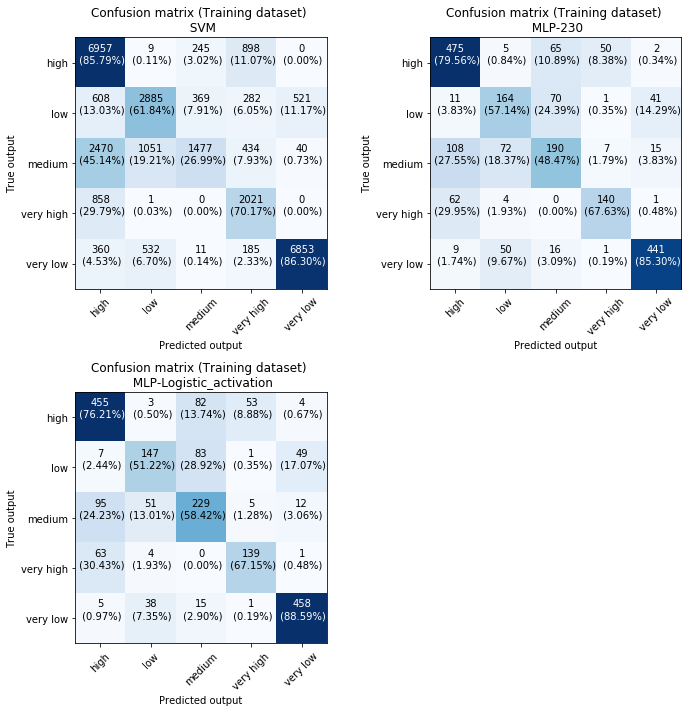

In [236]:
# Your code for the confusion matrices on the training data

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# SVM
# y_pred_svm_train = cross_val_predict(classifier_3, X_train_svm, y_train_svm, cv=3, n_jobs=-1)

# MLP 230
# y_pred_mlp230_train = cross_val_predict(mlp_230, X_train_mlp, y_train_mlp, cv=3, n_jobs=-1)

# MLP Logistic Activation
# y_pred_mlplog_train = cross_val_predict(mlp_logistic, X_train_mlp, y_train_mlp, cv=3, n_jobs=-1)

conf_log_train = confusion_matrix(y_train_svm, y_pred_svm_train)
conf_mlp230_train = confusion_matrix(y_train_mlp, y_pred_mlp230_train)
conf_mlplog_train = confusion_matrix(y_train_mlp, y_pred_mlplog_train)
lbls = ['high', 'low', 'medium', 'very high', 'very low']

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plot_confusion_matrix(conf_log_train, lbls, title='Confusion matrix (Training dataset) \n SVM')
plt.subplot(2,2,2)
plot_confusion_matrix(conf_mlp230_train, lbls, title='Confusion matrix (Training dataset) \n MLP-230')
plt.subplot(2,2,3)
plot_confusion_matrix(conf_mlplog_train, lbls, title='Confusion matrix (Training dataset) \n MLP-Logistic_activation')
plt.tight_layout()
plt.show()

- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

[[3512    5   46  427    0]
 [ 269 1368  172  140  248]
 [1280  496  717  235   22]
 [ 436    0    0  980    0]
 [ 209  254    5  104 3392]]
[[454   3  69  31   5]
 [ 14 205  66   0  47]
 [ 98  60 189   4   6]
 [ 92   2   2  92   0]
 [  6  36  11   2 506]]
[[450   2  55  49   6]
 [ 12 215  64   1  40]
 [ 98  67 184   3   5]
 [ 80   0   0 108   0]
 [  5  44   8   2 502]]


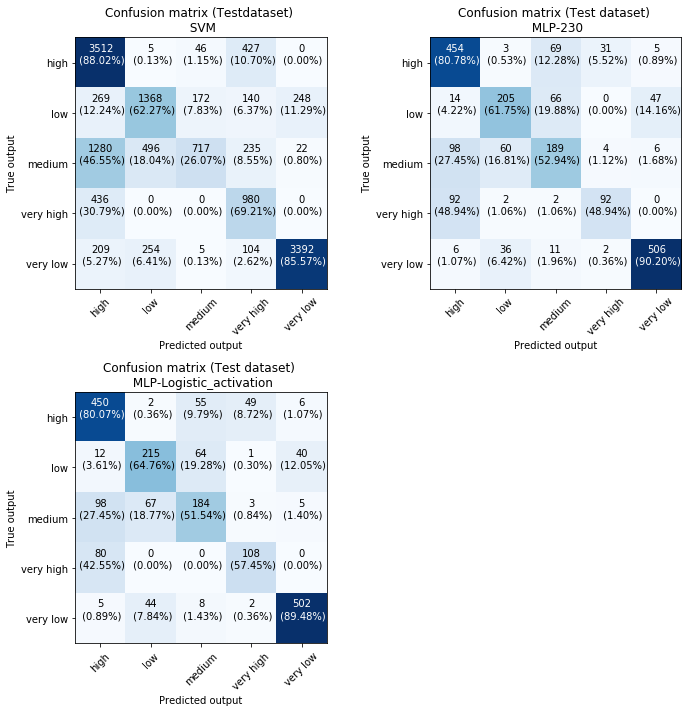

In [238]:
# Your code for the confusion matrices on the test data

# SVM
# y_pred_svm_test = cross_val_predict(classifier_3, X_test_svm, y_test_svm, cv=3, n_jobs=-1)

# MLP 230
# y_pred_mlp230_test = cross_val_predict(mlp_230, X_test_mlp, y_test_mlp, cv=3, n_jobs=-1)

# MLP Logistic Activation
# y_pred_mlplog_test = cross_val_predict(mlp_logistic, X_test_mlp, y_test_mlp, cv=3, n_jobs=-1)

conf_log_test = confusion_matrix(y_test_svm, y_pred_svm_test)
conf_mlp230_test = confusion_matrix(y_test_mlp, y_pred_mlp230_test)
conf_mlplog_test = confusion_matrix(y_test_mlp, y_pred_mlplog_test)
lbls = ['high', 'low', 'medium', 'very high', 'very low']

plt.figure(figsize=(10, 10))
plt.subplot(2,2,1)
plot_confusion_matrix(conf_log_test, lbls, title='Confusion matrix (Test dataset) \n SVM')
plt.subplot(2,2,2)
plot_confusion_matrix(conf_mlp230_test, lbls, title='Confusion matrix (Test dataset) \n MLP-230')
plt.subplot(2,2,3)
plot_confusion_matrix(conf_mlplog_test, lbls, title='Confusion matrix (Test dataset) \n MLP-Logistic_activation')
plt.tight_layout()
plt.show()

- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [255]:
# Your code for precision, recall and F1-scores on the test data
from sklearn.metrics import precision_recall_curve, classification_report, f1_score
from sklearn.model_selection import cross_validate

# Print cross_validate possible scoring
# from sklearn.metrics import SCORERS
# print(SCORERS.keys())

print('SVM classification report:')
print(' ')
print(classification_report(y_test_svm, y_pred_svm_test, digits=4))
# scoring = {'acc': 'accuracy',
#            'prec_macro': 'precision_macro',
#            'rec_micro': 'recall_macro'}
# scores = cross_validate(classifier_3, X_test_svm, y_test_svm, scoring=scoring,
#                          cv=3, return_train_score=True)
# print(scores.keys())
# print(scores['test_acc']) 
print('------------------------------------------------------')
print('MLP-230 classification report:')
print(' ')
print(classification_report(y_test_mlp, y_pred_mlp230_test, digits=4))
print('------------------------------------------------------')
print('MLP-logistic_activation classification report:')
print(' ')
print(classification_report(y_test_mlp, y_pred_mlplog_test, digits=4))

SVM classification report:
 
              precision    recall  f1-score   support

        high     0.6155    0.8802    0.7244      3990
         low     0.6444    0.6227    0.6333      2197
      medium     0.7628    0.2607    0.3886      2750
   very high     0.5196    0.6921    0.5936      1416
    very low     0.9263    0.8557    0.8896      3964

   micro avg     0.6963    0.6963    0.6963     14317
   macro avg     0.6937    0.6623    0.6459     14317
weighted avg     0.7248    0.6963    0.6787     14317

------------------------------------------------------
MLP-230 classification report:
 
              precision    recall  f1-score   support

        high     0.6837    0.8078    0.7406       562
         low     0.6699    0.6175    0.6426       332
      medium     0.5608    0.5294    0.5447       357
   very high     0.7132    0.4894    0.5804       188
    very low     0.8972    0.9020    0.8996       561

   micro avg     0.7230    0.7230    0.7230      2000
   macro avg  

- Accuracy scores on training and test data (give explicitly the result for each fold)

In [265]:
# Your code for accuracy scores on training and test data
print(tabulate([["SVM", accuracy_score(y_train_svm, y_pred_svm_train)],
                ["MLP-230", accuracy_score(y_train_mlp, y_pred_mlp230_train)],
                ["MLP-Logistec_activation", accuracy_score(y_train_mlp, y_pred_mlplog_train)]],
              headers=["Scores for training data", ""]))

print(' ')

print(tabulate([["SVM", accuracy_score(y_test_svm, y_pred_svm_test)],
                ["MLP-230", accuracy_score(y_test_mlp, y_pred_mlp230_test)],
                ["MLP-Logistec_activation", accuracy_score(y_test_mlp, y_pred_mlplog_test)]],
              headers=["Scores for test data", ""]))


Scores for training data
--------------------------  --------
SVM                         0.694705
MLP-230                     0.705
MLP-Logistec_activation     0.714
 
Scores for test data
-----------------------  --------
SVM                      0.696305
MLP-230                  0.723
MLP-Logistec_activation  0.7295


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:

All three models perform very similarly in terms of accuracy scores in both training and test data. The one with the highest accuracy score in the MLP classifier with the logistic activation function.
It is worth noting that the precision and recall rates are generally higher in the MLP classifiers over the SVM, maybe because there is a very big number of descriptive features.

In our opinion for this kind data, MLP would perform better because MLP is good with handling multiple features data. Especially when the data need multiple boundaries to classify them.


   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:

After comparing the test scores and training scores among the three different models, we concluded that the it is unlikely that any of the models are overfit or underfit, as the test scores are always higher than the train scores but only slightly, which is what we expect because overfitting
would mean that the training models would fit the data too well and would not be able to generalize to unseen data, meaning that possibly the train scores would be high and their test scores low, and underfitting would mean that the model does not fit the data well enough which also does not seem to happen as the precision and recall rates show at least decent results


   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:

Both are used to evaluate model performance. The train_test_split method splits the data into a training set and a test set only once, whereas cross validation splits the data into a number of subsets of equal size, in which one subset will be a test set and the rest of the subsets are for training, it will then run iteratively until each of the subsets has been used as a test set, so the cross validation has the advantage that is it not influenced by our choices of how we split the data as it is in the train_test_split method. 
Although, it has the disadvantage of being more computationally expensive and more time consuming, as a result of creating more models, in the specific case of k-fold cross validation it would create k number of models more than a regular train_test_split which only creates one.
